In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='talk',font_scale=1.3)
from scipy.io import netcdf
import numpy as np
from spectra_module import spec2d
from matplotlib.colors import LogNorm
import pandas as pd
import glob
import warnings
warnings.simplefilter('ignore')

In [449]:
def compute_spectra(file,binsize=7):
    
    name = file.split('/')[-1].split('.')[0].split('_')[-1]
    f = netcdf.netcdf_file(file,'r')
    
    ups = np.zeros((len(zgrid),28))
    vps = np.zeros_like(ups)
    ps1D = np.zeros_like(ups)
    bin_cents = np.zeros_like(ups)
    for k in range(len(zgrid)):

        u = f.variables['u'][:][k,:,:].copy()
        v = f.variables['v'][:][k,:,:].copy()

        ups[k,:], bin_cents[k,:] = spec2d(u,logspacing=True,return_freqs=True,binsize=binsize)
        vps[k,:], bin_cents[k,:] = spec2d(v,logspacing=True,return_freqs=True,binsize=binsize)

        ps1D[k,:] = 0.5*(ups[k,:]+vps[k,:])

    return ps1D, bin_cents

def plot_spectra(ps1D,bin_cents):
    #bin_cents=bin_cents/(2*np.pi)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    h=ax1.pcolormesh(bin_cents[0,:],zgrid,ps1D,norm=LogNorm(vmin=ps1D.min(), vmax=ps1D.max()),
                     cmap='viridis',vmin=1e0,vmax=1e7)
    
    idepths = [48,47,46,45,40,30,10,5]
    colors = sns.color_palette(n_colors=len(idepths))
    for i,z in enumerate(idepths):
        ax1.axhline(zgrid[z],color = colors[i])
    ax1.set_xscale('log')
    ax1.set_xlim(5e-3,1e0)
    ax1.set_ylim(-1050,0)
    plt.colorbar(h,ax=ax1,label='log(PSD)',aspect=40,pad=0.02,)
    ax1.set_ylabel('depth')
    ax1.set_xlabel('inverse wavelength [1/km]')
    
    for i in idepths:
        ax2.loglog(bin_cents[0,:],ps1D[i,:],label='z=%d m' %zgrid[i])

    if True:
        ax2.loglog(bin_cents[0,:],np.exp(-3)*bin_cents[0,:]**(-2),color='black',lw=0.5)
        ax2.loglog(bin_cents[0,:],np.exp(-5)*bin_cents[0,:]**(-3),color='black',lw=0.5)
        ax2.annotate('-3',(1e-2,6e3),fontsize=20)
        ax2.annotate('-2',(1e-2,5e2),fontsize=20)

    ax2.set_xlim(5e-3,1e0)
    ax2.set_ylim(1e0,5e7)
    ax2.set_xlabel('inverse wavelength [1/km]')
    ax2.set_ylabel(r'power spectral density $m^3/s^2$')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('./figures_06/spec_vs_depth_06_'+name+'.pdf',dpi=500,bbox_inches='tight')
    plt.show()

In [430]:
path = './output_2013asiri_06b/'
zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][1:51].astype('float')
n = glob.glob(path+'*full_*')

In [431]:
n[400],n[750]

('./output_2013asiri_06b/full_20000.cdf',
 './output_2013asiri_06b/full_37500.cdf')

In [459]:
liste=[]
for i in range(700,750,5):
    ps1d,bin_cents = compute_spectra(n[-1*(i+1)])
    liste.append(ps1d)

In [460]:
mean_ps1d= np.nanmean(np.array(liste),axis=0)

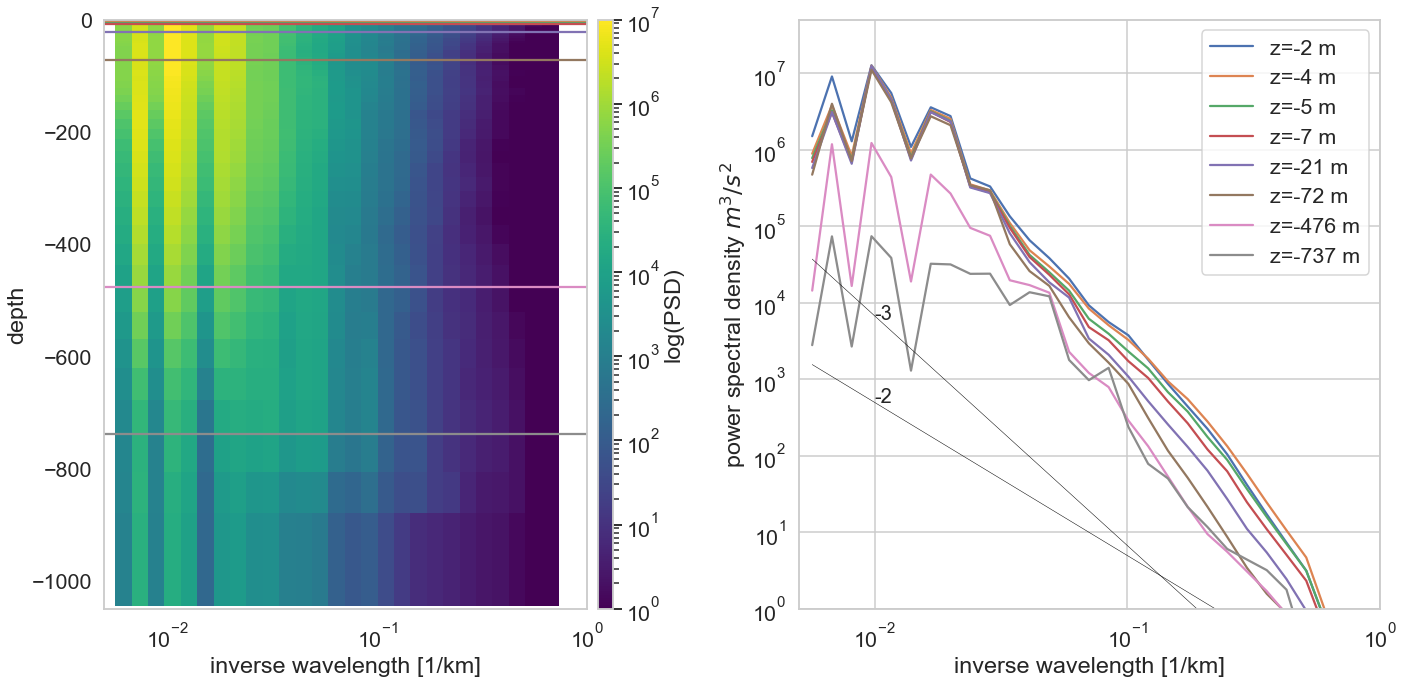

In [461]:
plot_spectra(mean_ps1d,bin_cents)

In [1]:
f,ax2=plt.subplots(1,1,figsize=(10,8))
for i in idepths:
    ax2.loglog(bin_cents[0,:],mean_ps1d[i,:]/bin_cents[0,:]**(-2),label='z=%d m' %zgrid[i])

if True:
    ax2.loglog(bin_cents[0,:],np.exp(-3)*bin_cents[0,:]**(-2)/bin_cents[0,:]**(-2),color='black',lw=0.5)
    ax2.loglog(bin_cents[0,:],np.exp(-5)*bin_cents[0,:]**(-3)/bin_cents[0,:]**(-2),color='black',lw=0.5)
    ax2.annotate('-3',(1e-2,6e3),fontsize=20)
    ax2.annotate('-2',(1e-2,5e2),fontsize=20)

ax2.set_xlim(5e-3,1e0)
#ax2.set_ylim(1e0,5e7)
ax2.set_xlabel('inverse wavelength [1/km]')
ax2.set_ylabel(r'power spectral density $m^3/s^2$')
ax2.legend()

NameError: name 'plt' is not defined